In [15]:
%matplotlib inline

In [43]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
car_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",names = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price'])

In [44]:
car_df.head(2).transpose()

,0,1
symboling,3,3
normalized_losses,?,?
make,alfa-romero,alfa-romero
fuel_type,gas,gas
aspiration,std,std
num_of_doors,two,two
body_style,convertible,convertible
drive_wheels,rwd,rwd
engine_location,front,front
wheel_base,88.6,88.6


In [19]:
car_df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [45]:
car_df = car_df.drop('make', axis=1)


car_df = car_df.drop('fuel_type', axis=1)
car_df = car_df.drop('engine_location', axis=1)
car_df = car_df.drop('num_of_doors', axis=1)
car_df = car_df.drop('body_style', axis=1)
car_df = car_df.drop('drive_wheels', axis=1)
car_df = car_df.drop('engine_type', axis=1)
car_df = car_df.drop('fuel_system', axis=1)
car_df = car_df.drop('aspiration', axis=1)
car_df = car_df.drop('normalized_losses', axis=1)

In [46]:
car_df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [47]:
car_df['cylinder'] = car_df['num_of_cylinders'].replace({'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,'six': 6,'seven': 7})

In [49]:
car_df = car_df.replace('?', np.nan)


car_df['bore'] = car_df['bore'].astype('float64')
car_df['stroke'] = car_df['bore'].astype('float64')
car_df['horsepower'] = car_df['bore'].astype('float64')
car_df['peak_rpm'] = car_df['bore'].astype('float64')
car_df['price'] = car_df['bore'].astype('float64')


car_df['price'] = car_df['price'].fillna(car_df['price'].median())
car_df['bore'] = car_df['bore'].fillna(car_df['bore'].median())
car_df['horsepower'] = car_df['horsepower'].fillna(car_df['horsepower'].median())
car_df['peak_rpm'] = car_df['peak_rpm'].fillna(car_df['peak_rpm'].median())
car_df['stroke'] = car_df['stroke'].fillna(car_df['stroke'].median())
car_df['cylinder'] = car_df['cylinder'].fillna(car_df['cylinder'].median())

TypeError: could not convert string to float: 'twelve'

In [50]:
car_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94
compression_ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


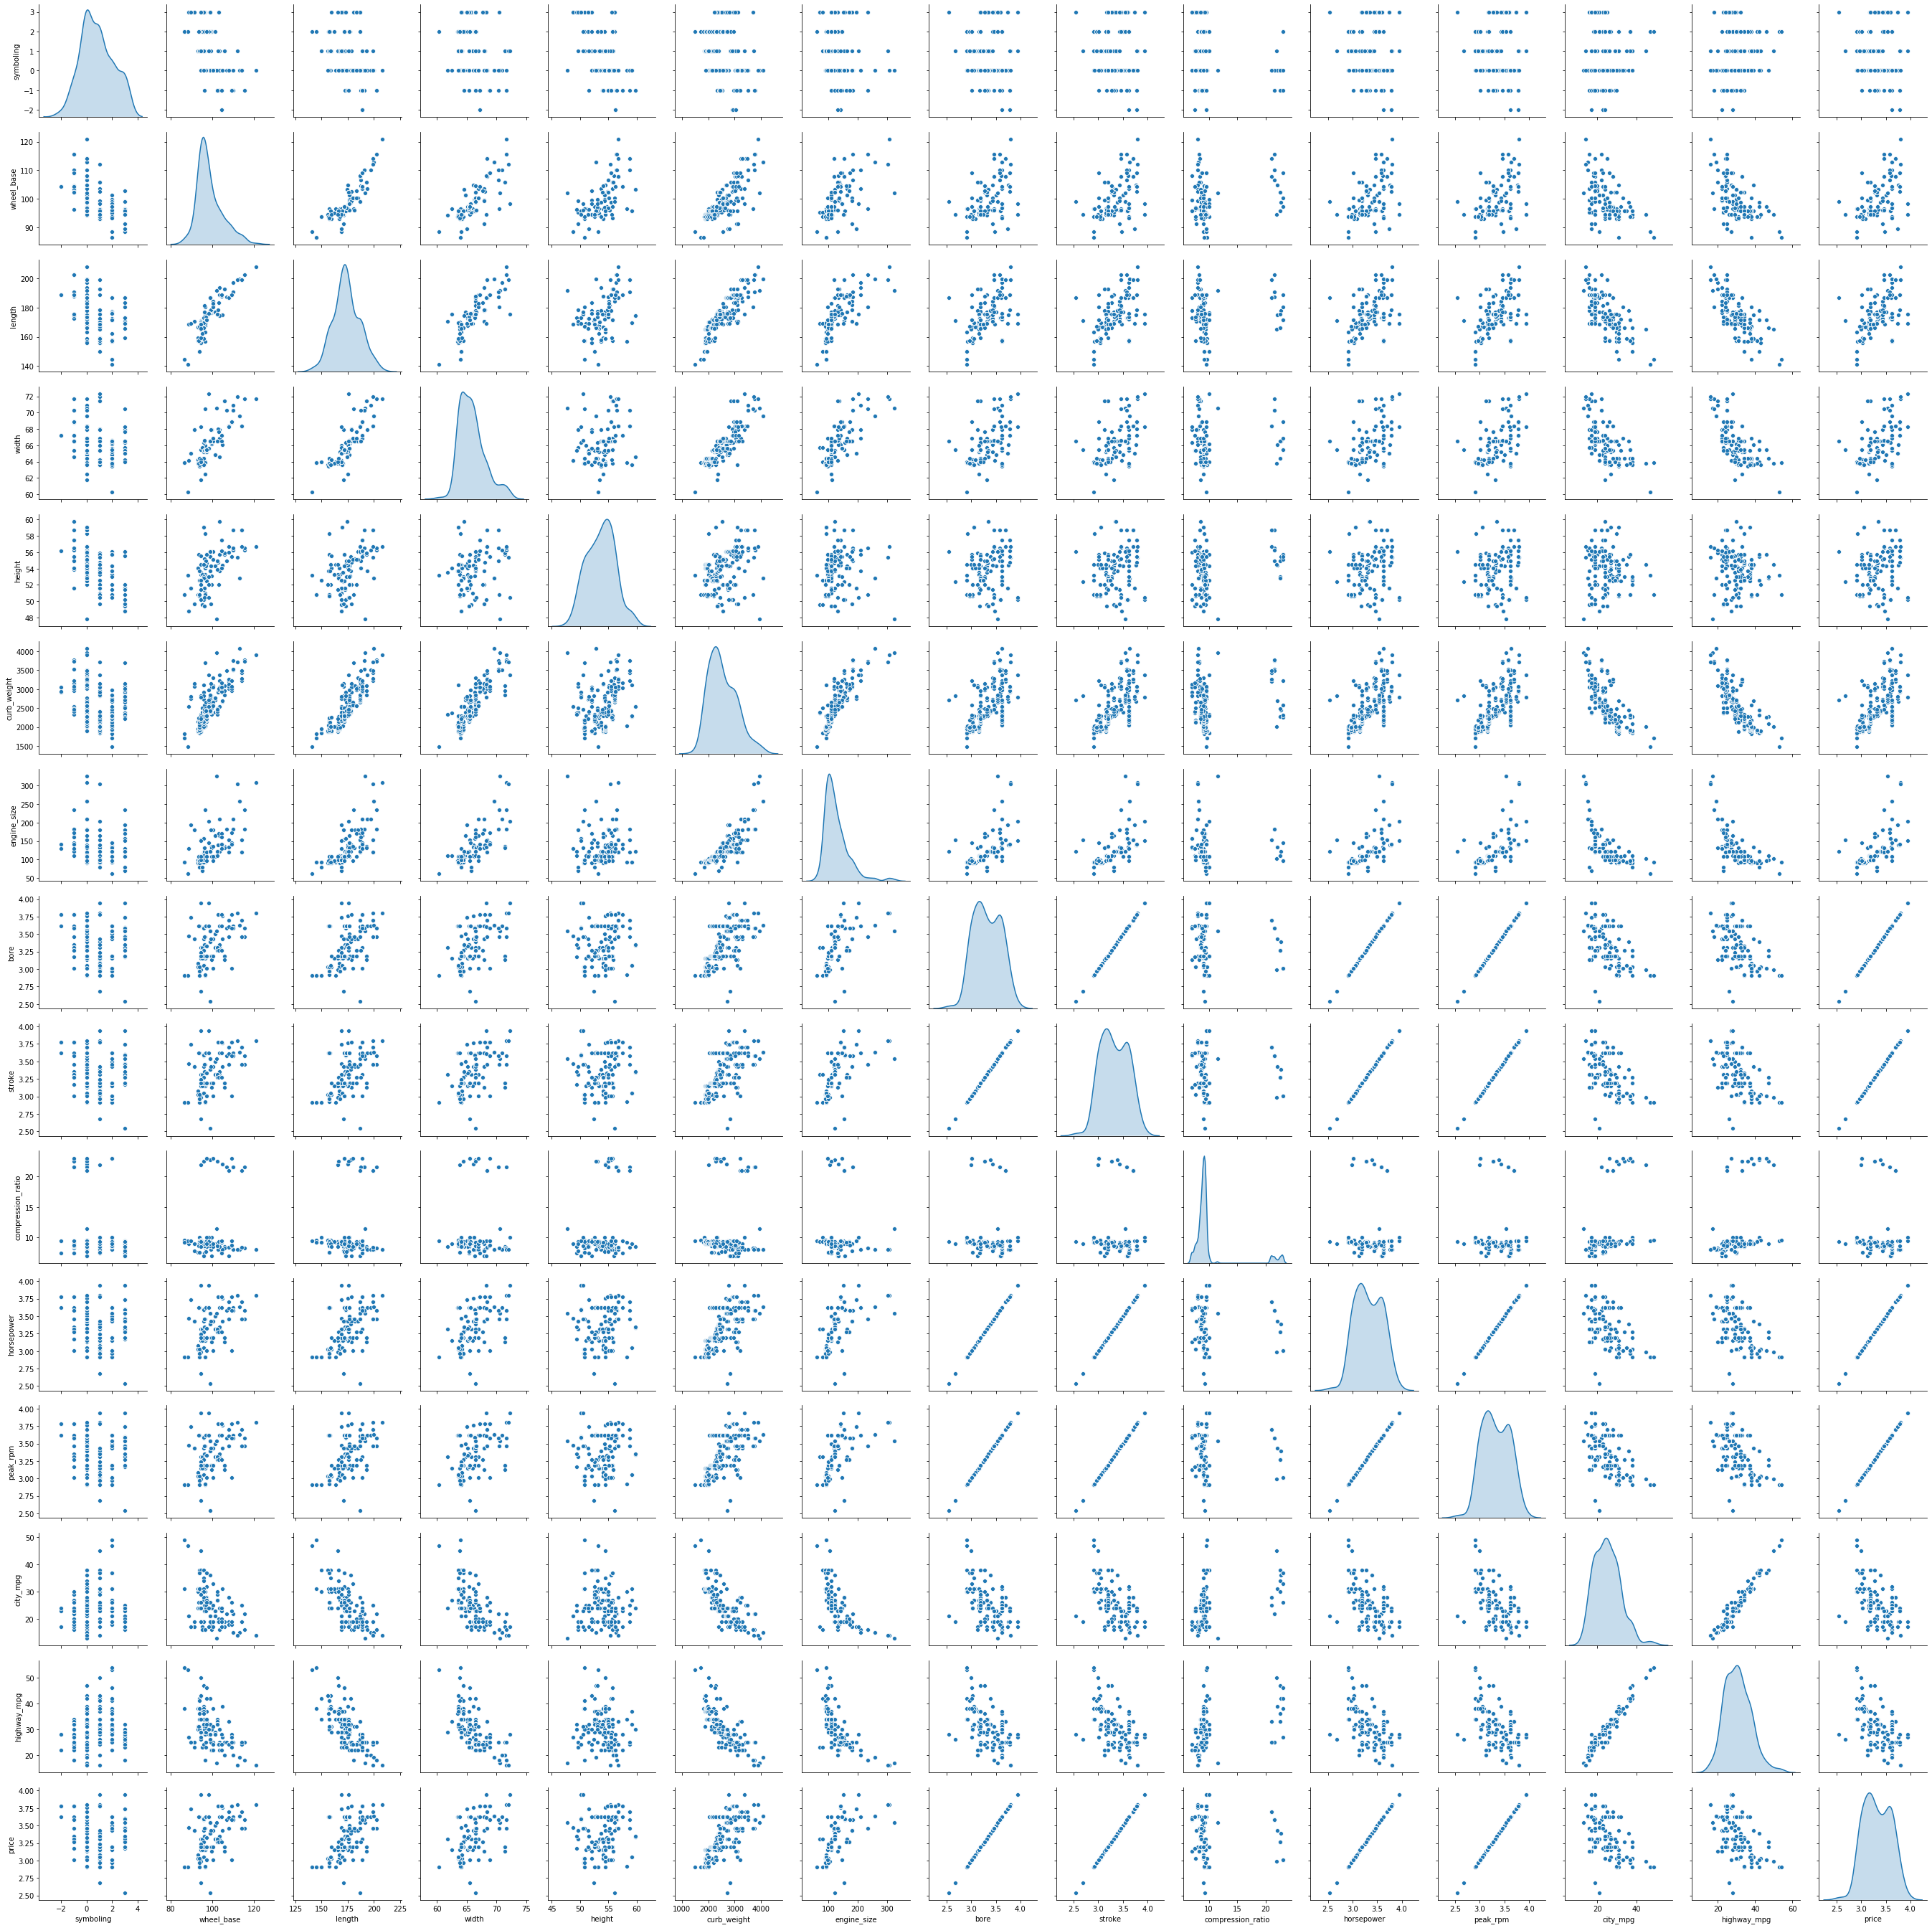

In [51]:
import seaborn as sns
car_df_attr = car_df.iloc[:,1:16]

#sns.pairplot(car_df_attr , diag_kind = 'kde')

sns.pairplot(car_df , diag_kind = 'kde')

In [52]:
X = car_df.drop('price', axis=1)
X = X.drop('num_of_cylinders', axis=1)


y = car_df[['price']]

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [73]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'eight'

In [74]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

AttributeError: 'LinearRegression' object has no attribute 'coef_'